# Proyecto final 
## Modelo 1 - Clasificación
### Programación de Inteligencia Artificial
### Redes neuronales con imágenes
# Juan Antonio Donet
[Github](https://github.com/hechix/Clasificar-y-segmentar-radiografias)

# Contexto

El proyecto consiste en 3 partes:

- 1. Clasificador, Crear una red neuronal que distinga entre radiografías de pacientes, tomadas de frente o desde el lateral, y clasificarlas según si son frontales o laterales.
- 2. Segmentador, Crear una red neuronal tomando la radiografía frontal, segmente los pulmones.
- 3. Clasificar y segmentar, (Este notebook) Crear un pequeño programa que al pasarle una radiografía, haga lo siguiente:
    - 1. Usar Clasificador para clasificar como frontal o lateral, en caso de no ser frontal, dar un error.
    - 2. Usar Segmentador para segmentar los pulmones.

# Estrategia

- 1. Cargar los modelos clasificador y segmentador seleccionados como mejores modelos.
- 2. Crear la función "clasificar_y_segmentar" que haga el trabajo sucio.
- 3. Pedir una imagen de entrada y clasificarla, segmentarla.

# 0. Importes, carga y preparación de datos

In [29]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from random import choice

In [5]:
IMG_LADO = 128
CMAP_IMAGEN = 'bone'
CMAP_PREDICCION ='coolwarm'

In [6]:
clasificador = tf.keras.models.load_model('modelos/clasificador_3.h5')
segmentador  = tf.keras.models.load_model('modelos/segmentador_3.h5')

Carga la imágen en escala de grises de 0 a 1, con tamaño IMG_LADO x IMG_LADO.

In [7]:
def cargar_img(ruta):
    img = cv2.imread(ruta)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (IMG_LADO, IMG_LADO))
    img = img.astype(np.float32)
    img = img / 255.0
    return img

# 1. Función "clasificar_y_segmentar"

In [26]:
def clasificar_y_segmentar(ruta):
    imagen_original = np.array([cargar_img(ruta)])
    
    predicc_clasificador = clasificador.predict(imagen_original)

    if predicc_clasificador[0][0] > 0.5:
        figura = plt.figure(figsize=(5,5))
        hueco = figura.add_subplot(1,1,1)
        hueco.imshow(imagen_original[0], cmap=CMAP_IMAGEN)
        hueco.set_axis_off()
        hueco.set_title(f'Lateral ({"%.3f" % predicc_clasificador[0][0]} conf.)')
        return

    predicc_clasificador[0][0] *= -1
    predicc_clasificador[0][0] += 1

    mascara = segmentador.predict(imagen_original)
    
    figura = plt.figure(figsize=(10,5))
    hueco = figura.add_subplot(1,2,1)
    hueco.imshow(imagen_original[0], cmap=CMAP_IMAGEN)
    hueco.set_axis_off()
    hueco.set_title(f'Frontal ({"%.3f" % predicc_clasificador[0][0]} conf.)')

    hueco = figura.add_subplot(1,2,2)
    hueco.imshow(mascara[0], cmap=CMAP_PREDICCION)
    hueco.set_axis_off()
    hueco.set_title(f'Mascara')

In [40]:
def clasificar_y_segmentar_aleatorio(raiz = 'frontal_lateral'):
    while os.path.isdir(raiz):
        archivos = os.listdir(raiz)
        raiz += '/' + choice(archivos)
    
    print('Imágen seleccionada:', raiz)

    clasificar_y_segmentar(raiz)

# 2. Resultados

## 2.1 Resultados con imágenes específicas

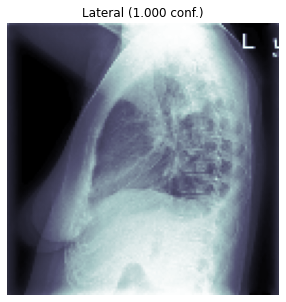

In [27]:
clasificar_y_segmentar('frontal_lateral/test/lateral/patient01208_study1_view2_lateral.jpg')

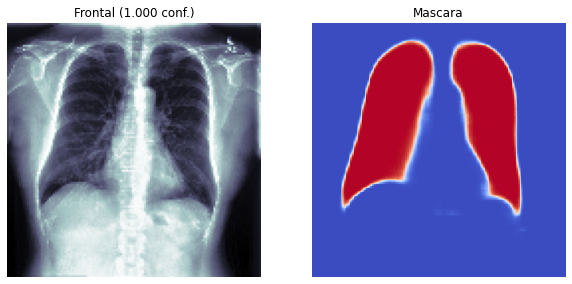

In [28]:
clasificar_y_segmentar('frontal_lateral/test/frontal/patient09056_study1_view1_frontal.jpg')

## 2.2 Resultados con imágenes aleatorias

Imágen seleccionada: frontal_lateral/test/lateral/patient60512_study2_view2_lateral.jpg


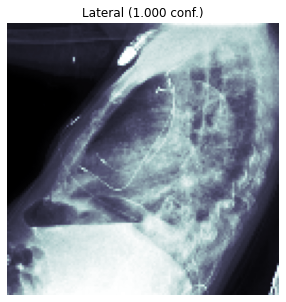

In [53]:
clasificar_y_segmentar_aleatorio('frontal_lateral/test/lateral')

Imágen seleccionada: frontal_lateral/test/frontal/patient34928_study9_view1_frontal.jpg


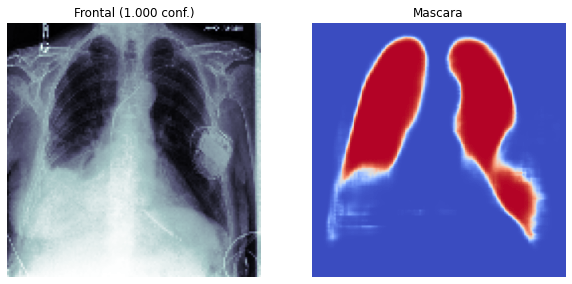

In [54]:
clasificar_y_segmentar_aleatorio('frontal_lateral/test/frontal')

Imágen seleccionada: frontal_lateral/test/lateral/patient22932_study1_view3_lateral.jpg


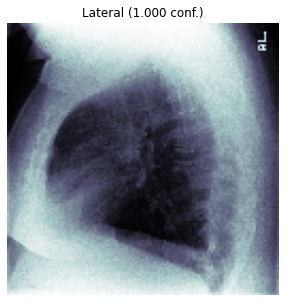

In [55]:
clasificar_y_segmentar_aleatorio('frontal_lateral/test/lateral')

Imágen seleccionada: frontal_lateral/test/frontal/patient11197_study9_view1_frontal.jpg


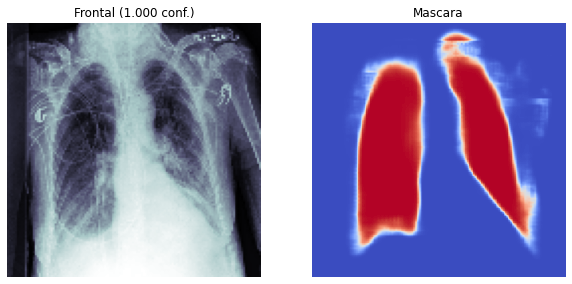

In [56]:
clasificar_y_segmentar_aleatorio('frontal_lateral/test/frontal')

Imágen seleccionada: frontal_lateral/test/lateral/patient20019_study14_view2_lateral.jpg


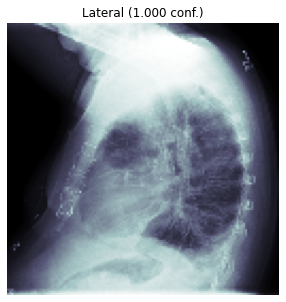

In [57]:
clasificar_y_segmentar_aleatorio('frontal_lateral/test/lateral')

Imágen seleccionada: frontal_lateral/test/frontal/patient17996_study1_view1_frontal.jpg


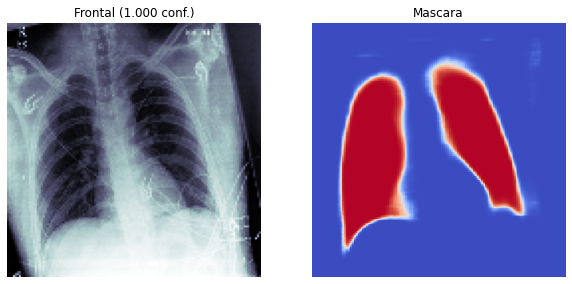

In [59]:
clasificar_y_segmentar_aleatorio('frontal_lateral/test/frontal')

## 2.3 Resultados incorrectos.

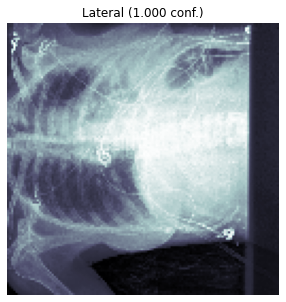

In [62]:
clasificar_y_segmentar('frontal_lateral/test/frontal/patient47893_study2_view1_frontal.jpg')

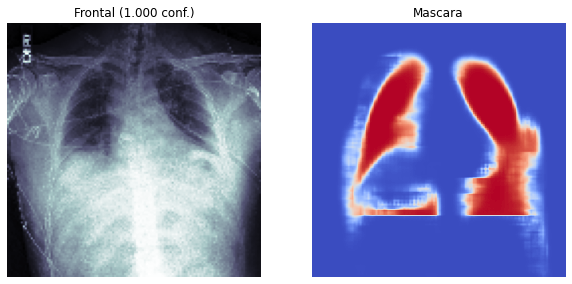

In [75]:
clasificar_y_segmentar('frontal_lateral/validation/frontal/patient34865_study1_view1_frontal.jpg')

Los modelos entrenados se pueden descargar en [Github](https://github.com/hechix/Clasificar-y-segmentar-radiografias)